<a href="https://colab.research.google.com/github/aahan-rd/ECON3916-Statistical-Machine-Learnin/blob/main/Lab_3_Visualizing_Development_with_WBGAPI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wbgapi

In [3]:
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
indicators = {
    'NY.GDP.PCAP.KD':'GDP_Per_Capita_Const',
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',
    'NY.GDP.MKTP.KD': 'GDP_Const',
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',
    'NE.EXP.GNFS.ZS': 'Exports_GDP',
    'NE.IMP.GNFS.ZS': 'Imports_GDP',
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'
}

In [4]:
print("Fetching Data...")
def countrySpecific(country_code) :
    country_codes = [country_code,"UMC","WLD"]
    df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000,2025))
    df=df_raw.T
    df.index = df.index.str.replace('YR','').astype(int)
    df.index.name="Year"
    df = df.sort_index()
    df.rename(columns=indicators, level=1, inplace=True)
    df_ctr = df.xs(country_code, axis=1, level=0).copy()
    df_ctr['Natural_Rate_Unemp'] = df_ctr['Unemployment_Rate'].rolling(window=5).mean()
    df_ctr['Productivity'] = df_ctr['GDP_Const'] / df_ctr['Labor_Force_Total']
    df_ctr['NCO'] = df_ctr['Exports_GDP'] - df_ctr['Imports_GDP']
    df_ctr['Budget_Balance'] = df_ctr['Tax_Rev_GDP'] - df_ctr['Gov_Exp_GDP']
    return df_ctr,df

Fetching Data...


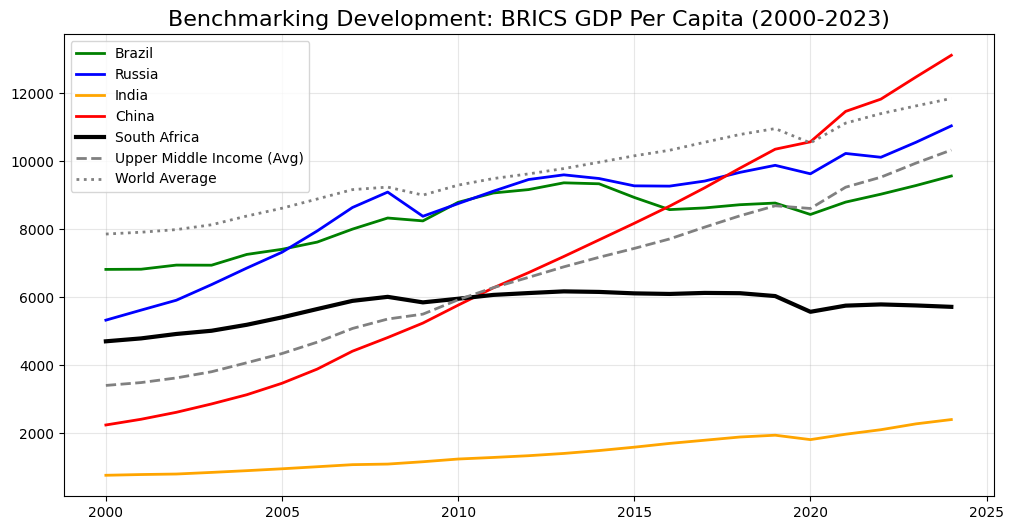

In [5]:
df_bra, df = countrySpecific('BRA')
df_rus, df = countrySpecific('RUS')
df_chn, df = countrySpecific('CHN')
df_ind, df = countrySpecific('IND')
df_zaf, df = countrySpecific('ZAF')
plt.figure(figsize=(12, 6))
plt.plot(df_bra.index, df_bra[( 'GDP_Per_Capita_Const')], label='Brazil', color='Green', linewidth=2)
plt.plot(df_rus.index, df_rus[( 'GDP_Per_Capita_Const')], label='Russia', color='Blue', linewidth=2)
plt.plot(df_ind.index, df_ind[( 'GDP_Per_Capita_Const')], label='India', color='Orange', linewidth=2)
plt.plot(df_chn.index, df_chn[( 'GDP_Per_Capita_Const')], label='China', color='Red', linewidth=2)
plt.plot(df_zaf.index, df_zaf[( 'GDP_Per_Capita_Const')], label='South Africa', color='Black', linewidth=3)
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='grey', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)
plt.title('Benchmarking Development: BRICS GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

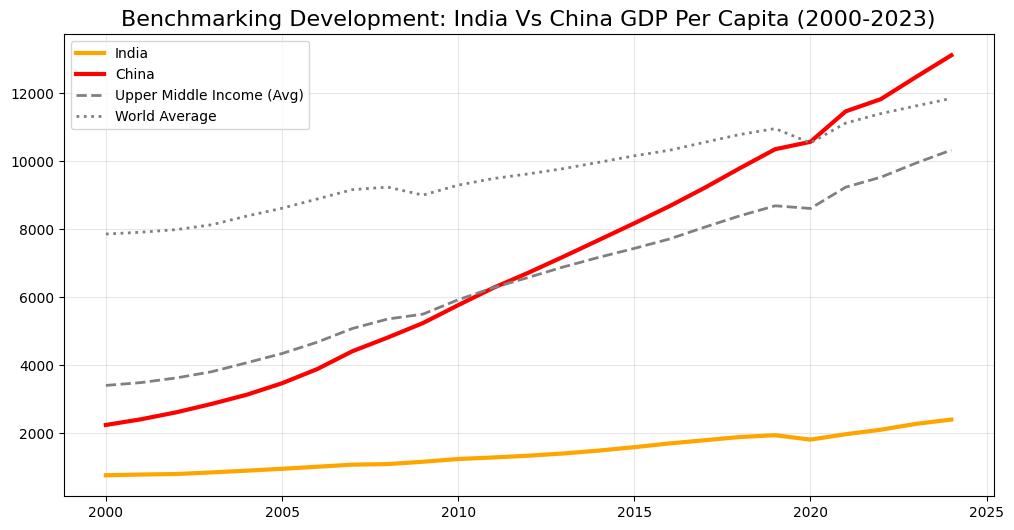

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df_ind.index, df_ind[( 'GDP_Per_Capita_Const')], label='India', color='Orange', linewidth=3)
plt.plot(df_chn.index, df_chn[( 'GDP_Per_Capita_Const')], label='China', color='Red', linewidth=3)
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='grey', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)
plt.title('Benchmarking Development: India Vs China GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

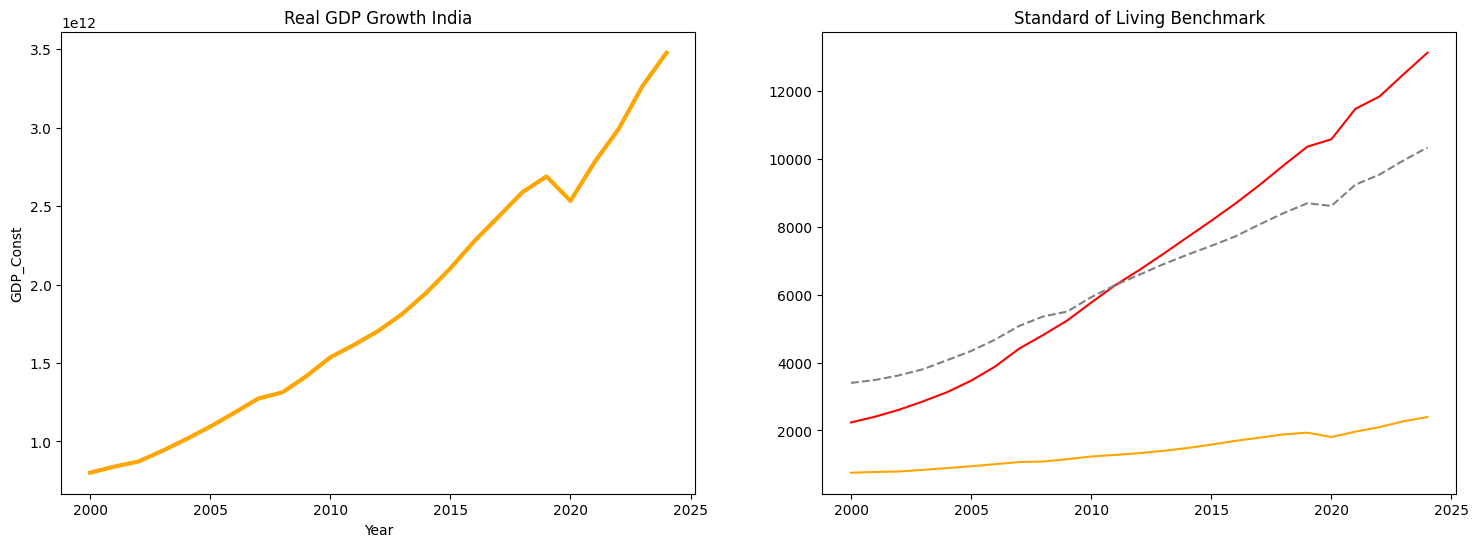

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(data=df_ind, x=df_ind.index, y='GDP_Const', color='orange', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth India')
ax2.plot(df_ind.index, df_ind[('GDP_Per_Capita_Const')], color='orange')
ax2.plot(df_chn.index, df_chn[('GDP_Per_Capita_Const')], color='red')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='grey', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

/tmp/ipython-input-3698053856.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


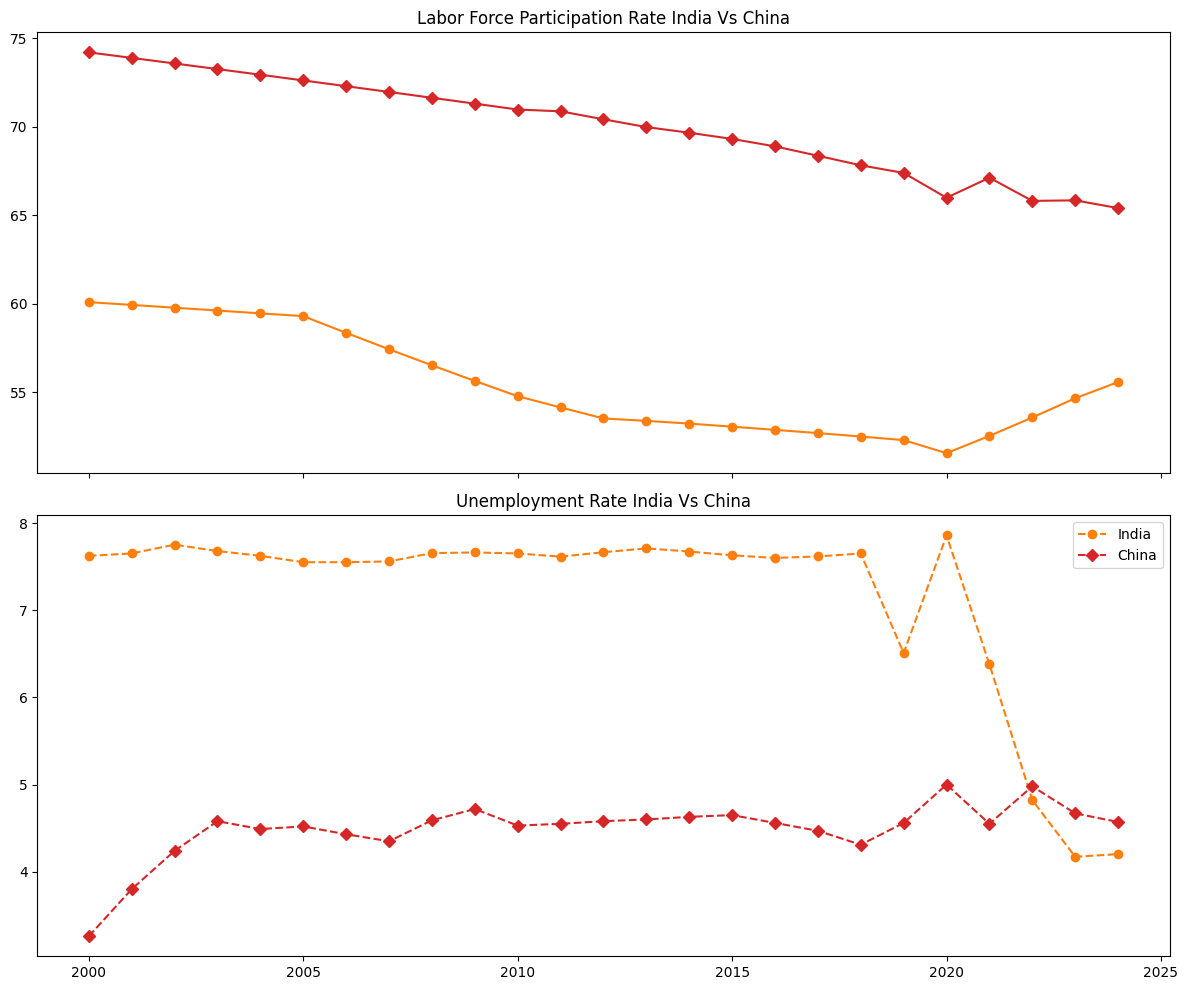

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax1.plot(df_ind.index, df_ind['Labor_Part_Rate'], label ="India",color='tab:orange', marker='o')
ax1.plot(df_chn.index, df_chn['Labor_Part_Rate'], label ="China",color='tab:red', marker='D')
ax1.set_title('Labor Force Participation Rate India Vs China')
plt.legend()
ax2.plot(df_ind.index, df_ind['Unemployment_Rate'], label="India",color='tab:orange', marker='o', linestyle='--')
ax2.plot(df_chn.index, df_chn['Unemployment_Rate'], label="China",color='tab:red', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate India Vs China')
plt.tight_layout()
plt.legend()
plt.show()

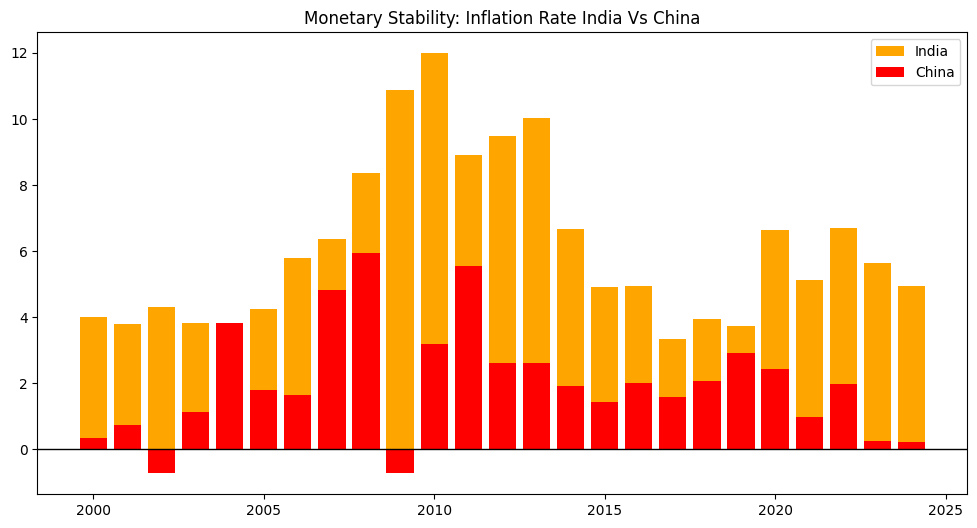

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(df_ind.index, df_ind['Inflation_CPI'], label='India',color='orange')
plt.bar(df_chn.index, df_chn['Inflation_CPI'], label='China',color='red')
plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate India Vs China')
plt.legend()
plt.show()

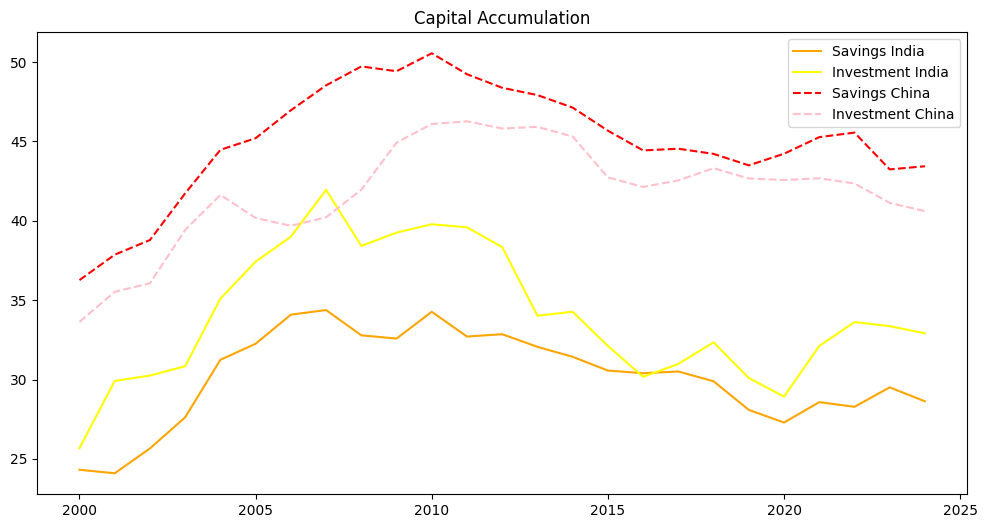

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_ind.index, df_ind['Gross_Dom_Savings'], label='Savings India', color='orange')
plt.plot(df_ind.index, df_ind['Gross_Cap_Formation'], label='Investment India', color='yellow')
plt.plot(df_chn.index, df_chn['Gross_Dom_Savings'], label='Savings China', color='red',linestyle='--')
plt.plot(df_chn.index, df_chn['Gross_Cap_Formation'], label='Investment China', color='pink',linestyle='--')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

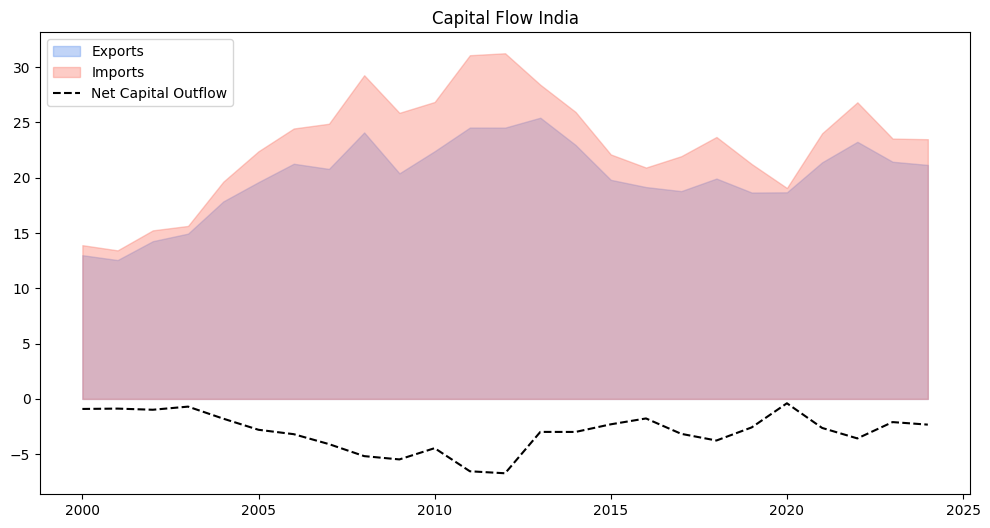

In [11]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_ind.index, df_ind['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_ind.index, df_ind['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_ind.index, df_ind['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.title('Capital Flow India')
plt.legend()
plt.show()

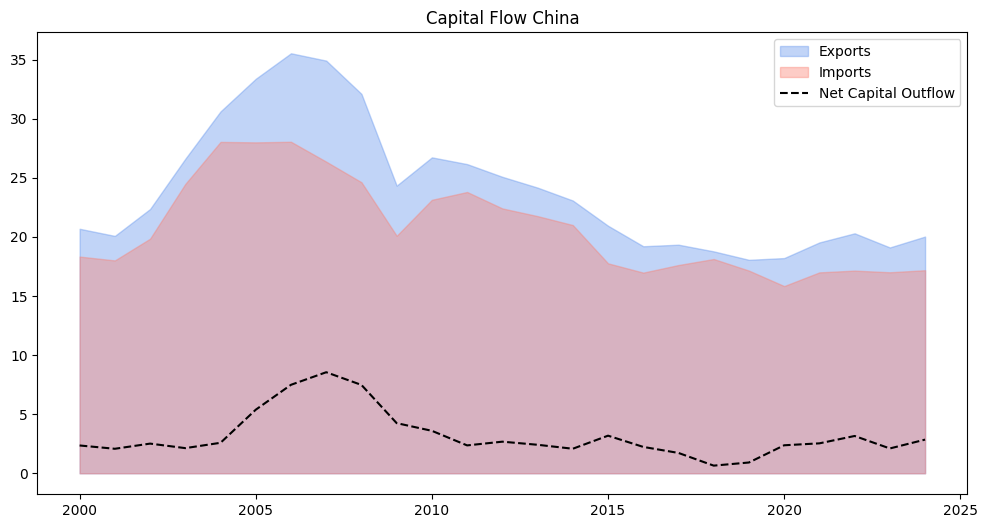

In [12]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chn.index, df_chn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.title('Capital Flow China')
plt.legend()
plt.show()

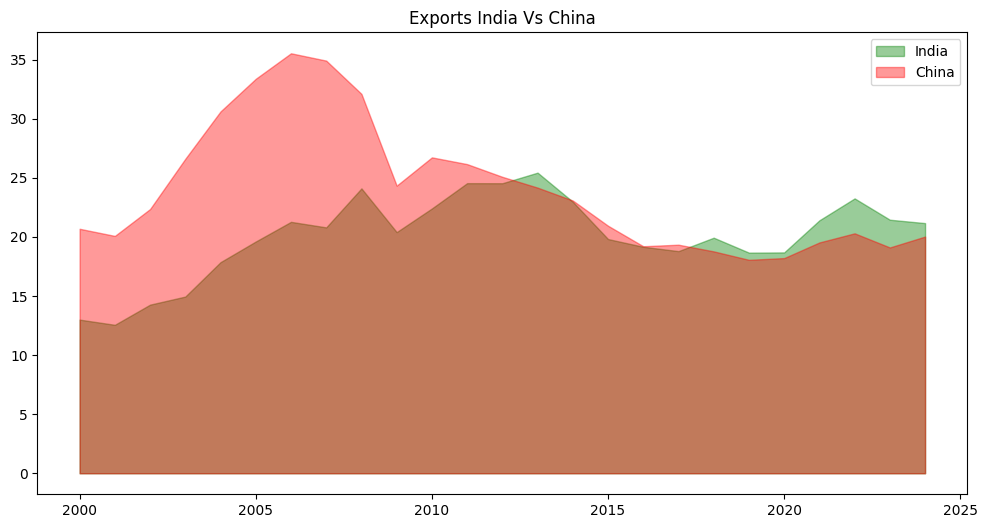

In [13]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_ind.index, df_ind['Exports_GDP'], color='green', alpha=0.4, label='India')
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='red', alpha=0.4, label='China')
plt.title('Exports India Vs China')
plt.legend()
plt.show()

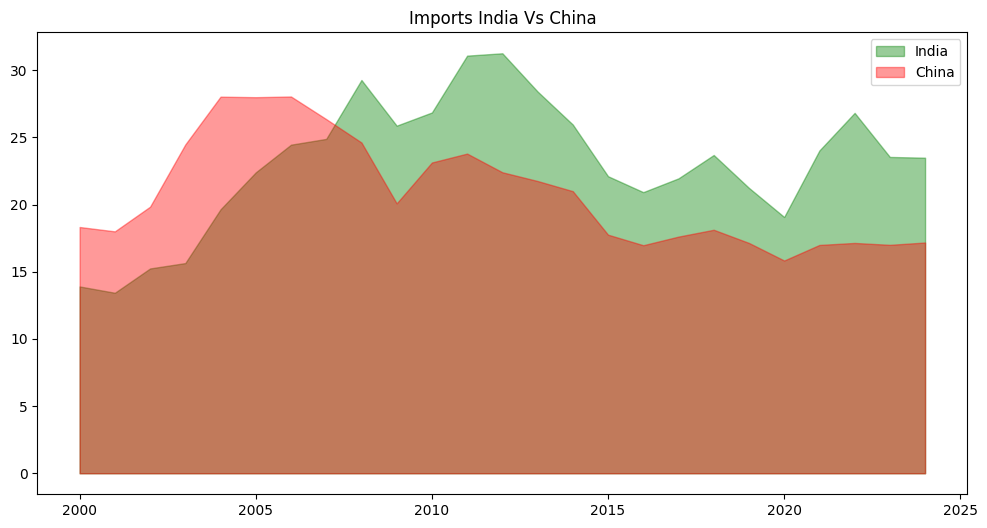

In [14]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_ind.index, df_ind['Imports_GDP'], color='green', alpha=0.4, label='India')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='red', alpha=0.4, label='China')
plt.title('Imports India Vs China')
plt.legend()
plt.show()

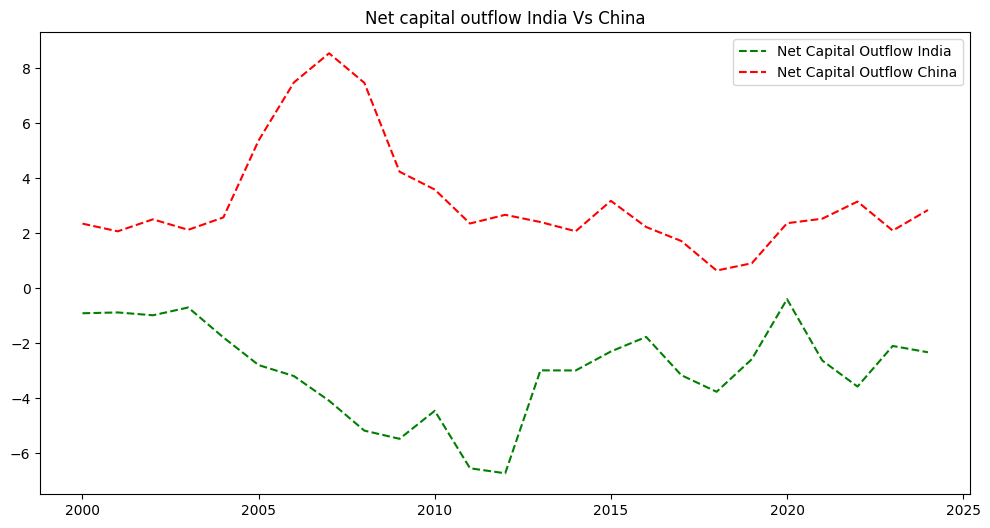

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df_ind.index, df_ind['NCO'], color='green', linestyle='--', label='Net Capital Outflow India')
plt.plot(df_chn.index, df_chn['NCO'], color='red', linestyle='--', label='Net Capital Outflow China')
plt.title('Net capital outflow India Vs China')
plt.legend()
plt.show()

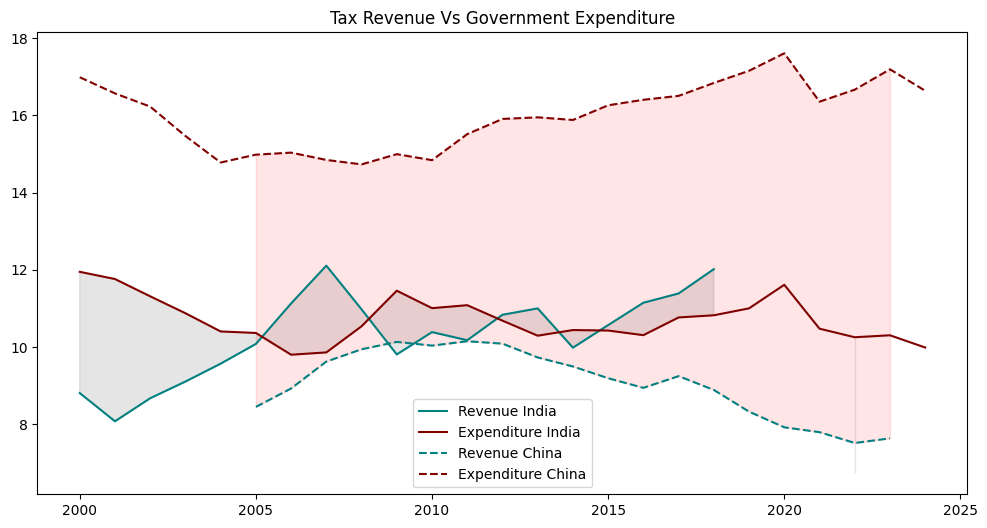

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_ind.index, df_ind['Tax_Rev_GDP'], label='Revenue India', color='teal')
plt.plot(df_ind.index, df_ind['Gov_Exp_GDP'], label='Expenditure India', color='maroon')
plt.fill_between(df_ind.index, df_ind['Tax_Rev_GDP'], df_ind['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.plot(df_chn.index, df_chn['Tax_Rev_GDP'], label='Revenue China', color='teal',linestyle="--")
plt.plot(df_chn.index, df_chn['Gov_Exp_GDP'], label='Expenditure China', color='maroon',linestyle="--")
plt.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'], color='red', alpha=0.1)
plt.title('Tax Revenue Vs Government Expenditure')
plt.legend()
plt.show()

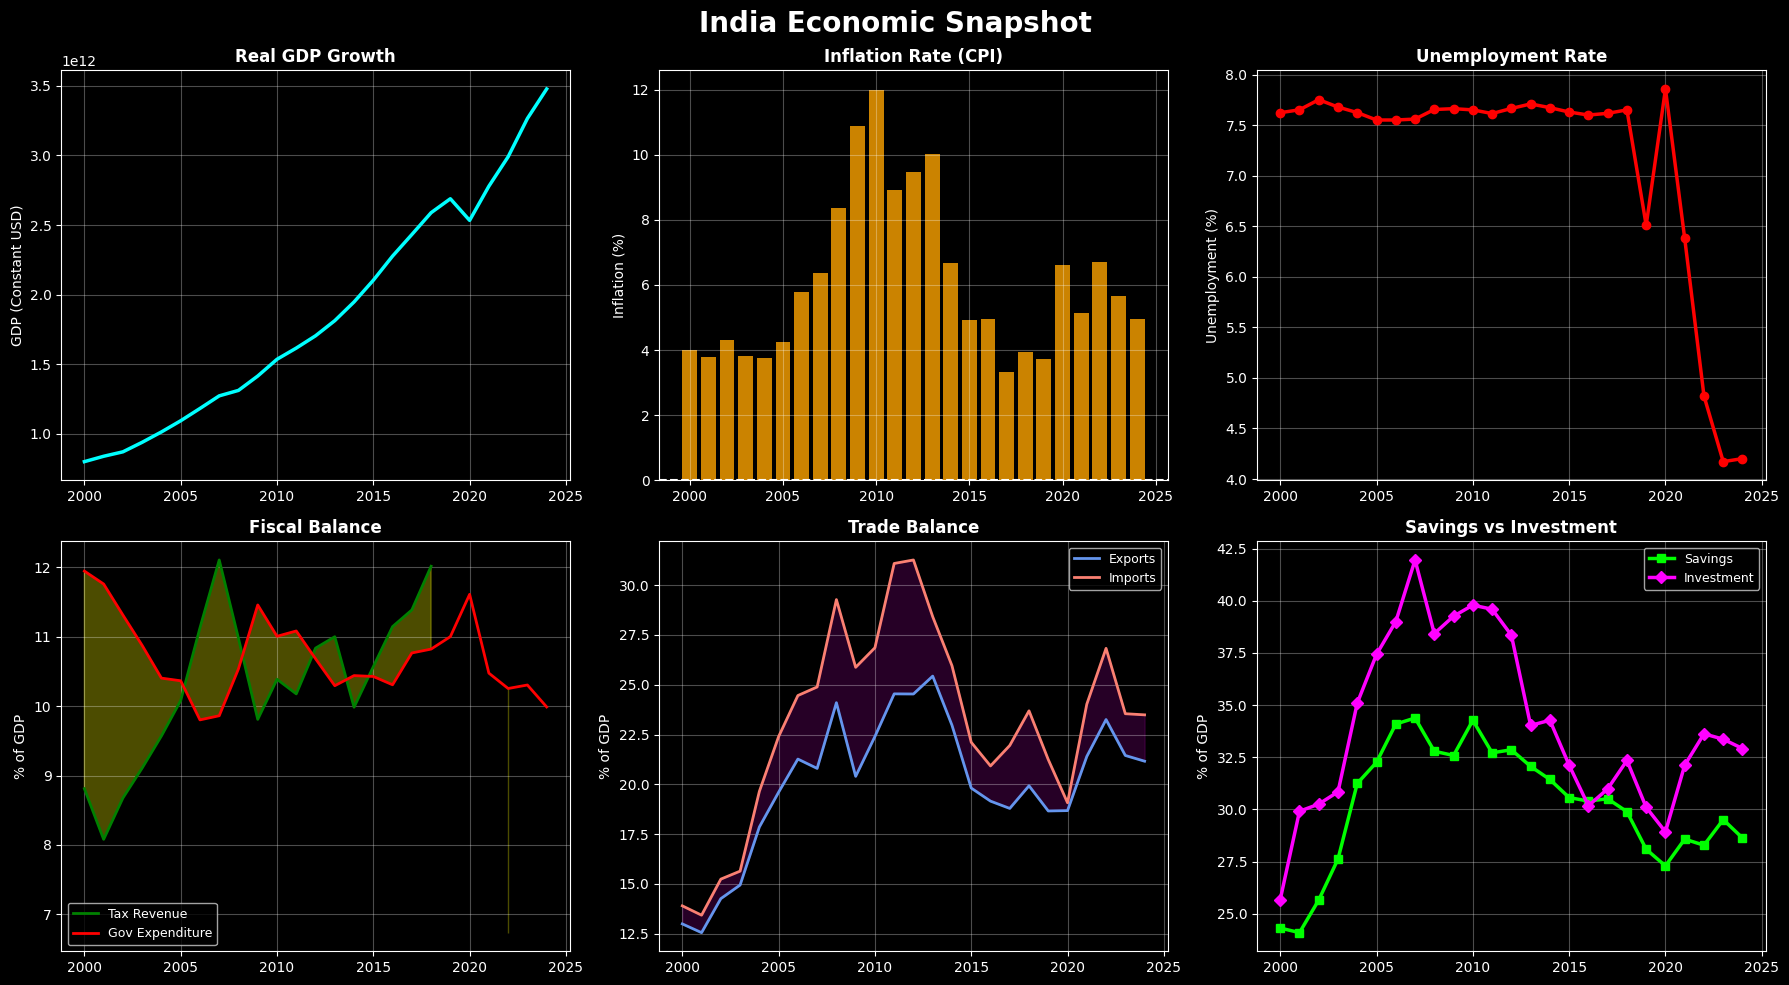

In [20]:
df_ctr,df=countrySpecific('IND')
plt.style.use('dark_background')
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes[0, 0].plot(df_ctr.index, df_ctr['GDP_Const'], color='cyan', linewidth=2.5)
axes[0, 0].set_title('Real GDP Growth', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('GDP (Constant USD)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 1].bar(df_ctr.index, df_ctr['Inflation_CPI'], color='orange', alpha=0.8)
axes[0, 1].axhline(0, color='white', linewidth=1.5, linestyle='--')
axes[0, 1].set_title('Inflation Rate (CPI)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Inflation (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 2].plot(df_ctr.index, df_ctr['Unemployment_Rate'], color='red', linewidth=2.5, marker='o')
axes[0, 2].set_title('Unemployment Rate', fontsize=12, fontweight='bold')
axes[0, 2].set_ylabel('Unemployment (%)')
axes[0, 2].grid(True, alpha=0.3)
axes[1, 0].plot(df_ctr.index, df_ctr['Tax_Rev_GDP'], label='Tax Revenue', color='green', linewidth=2)
axes[1, 0].plot(df_ctr.index, df_ctr['Gov_Exp_GDP'], label='Gov Expenditure', color='red', linewidth=2)
axes[1, 0].fill_between(df_ctr.index, df_ctr['Tax_Rev_GDP'], df_ctr['Gov_Exp_GDP'],
                         alpha=0.3, color='yellow')
axes[1, 0].set_title('Fiscal Balance', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('% of GDP')
axes[1, 0].legend(loc='best', fontsize=9)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 1].plot(df_ctr.index, df_ctr['Exports_GDP'], label='Exports', color='cornflowerblue', linewidth=2)
axes[1, 1].plot(df_ctr.index, df_ctr['Imports_GDP'], label='Imports', color='salmon', linewidth=2)
axes[1, 1].fill_between(df_ctr.index, df_ctr['Exports_GDP'], df_ctr['Imports_GDP'],
                         alpha=0.3, color='purple')
axes[1, 1].set_title('Trade Balance', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('% of GDP')
axes[1, 1].legend(loc='best', fontsize=9)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 2].plot(df_ctr.index, df_ctr['Gross_Dom_Savings'], label='Savings',
                color='lime', linewidth=2.5, marker='s')
axes[1, 2].plot(df_ctr.index, df_ctr['Gross_Cap_Formation'], label='Investment',
                color='magenta', linewidth=2.5, marker='D')
axes[1, 2].set_title('Savings vs Investment', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('% of GDP')
axes[1, 2].legend(loc='best', fontsize=9)
axes[1, 2].grid(True, alpha=0.3)
fig.suptitle('India Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()